# TP -- Regression Linéaire -- sklearn + Regularisation

# Version "démo de cours - déjà remplie" (pas forcément à 100%)

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

### Remarque: les parties sont indépendantes

# Partie 1 - mise en pratique

Puisqu'on n'a jamais fait de régression linéaire en TD, et qu'on en a parlé, mais assez rapidement, en cours, on commence par une illustration de ce que peut faire la régression linéaire, sur un cas concret:

C'est le fameux *boston house market* data set: 

https://www.kaggle.com/vikrishnan/boston-house-prices/ 

On s'inspire assez amplement de la solution de l'autrice du dataset, au moins pour ce qui est du chargement des données:

https://www.kaggle.com/vikrishnan/house-sales-price-using-regression

En gros, on a des données sur différents quartiers de Boston, et pour chaque quartier, on a le prix médian des maisons (ou appartements). On cherche à comprendre comment certains facteurs du voisinage déterminent le prix des maisons d'un quartier. Ou bien plus simplement, dans le cadre de ce DM, on se contente de tenter de prédire le prix des maisons en fonction des données fournies en entrée.

Comme d'habitude, on a $N$ points dans l'ensemble d'entraînement, chaque point de donnée est en dimension $D$, et les labels à prédire sont des valeurs continues, $y_n\in \mathbb{R}$.

In [3]:
# chargement des données
filename = "TP-RegressionLineaire-data-partie1-housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [4]:
## les colonnes (sauf la dernière) correspondent aux variables explicatives du prix (features)
features = dataset.columns[:-1]

# la derniere colonne, MEDV, correspond à la valeur médiane (Median Value) des maisons dans un quartier
label = dataset.columns[-1]

In [5]:
## on convertit les tableaux pandas en tabeaux numpy
X = dataset[features].values
Y = dataset[label].values

## Partie 1.1 - entrainement, validation, test

**C'est à vous de jouer !**

Il va vous falloir: (il y a des bouts de codes donnés, plus bas)
- Séparer les données en entrainement/test (30% pour le test, 70% l'entrainement)
- Utiliser le modèle d'apprentissage `sklearn.linear_model.Ridge`, qui correspond à la regression linéaire avec régularisation de type Ridge, c.a.d. de type $\alpha ||\vec{w}||_2^2$. Ce modèle dépend d'un hyper-paramètre $\alpha$ `alpha`, qui correspond au niveau de régularisation  (souvent noté $\lambda$ (lambda) en cours).
- Appliquer la cross-validation sur l'ensemble dit "d'entrainement" (les 70%). Utilisez 5 "plis" (*fold*). Cela va permettre de trouver la meilleure valeur possible pour l'hyper-paramètre `alpha`.
- Une fois la valeur idéale de $\alpha=\alpha^*$ trouvée, entrainer le modèle sur l'ensemble de l'ensemble d'entrainement (la totalité des 70%) et mesurer le score sur l'ensemble de test (et tant qu'à faire, aussi sur l'ensemble d'entrainement).

------
- Séparer les données en entrainement/test (30% pour le test, 70% l'entrainement)

On fait le fameux train-test split (séparation des données en ensemble d'entrainement+ensemble de test)

Indice: utilser, si vous le souhaitez, la méthode  `sklearn.model_selection.train_test_split`

In [6]:
test_ratio = 0.30
seed = 7
# X_train, X_test, Y_train, Y_test =  ??
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=test_ratio, random_state=seed)

In [7]:
valid_ratio = 0.30
seed = 8
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=test_ratio, random_state=seed)

In [8]:
np.logspace(-5,-2, num=4)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02])

In [9]:
alpha_values = np.logspace(-4,3, num=8)
alpha_values

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [10]:
# exemple de definition d'un modèle
alpha=3
monModele = sklearn.linear_model.Ridge(alpha=alpha)

In [21]:
    monModele.fit(X_train, Y_train)
    score1 = monModele.score(X_valid, Y_valid)
    score2 = monModele.score(X_train, Y_train)

In [22]:
score1, score2

(0.7660904579779402, 0.7530528011764382)

In [23]:
alpha_values

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [24]:
scores =[]
for alpha in alpha_values:
    # alpha est fixé (comme mu=mu0)
    monModele = sklearn.linear_model.Ridge(alpha=alpha)
    
    ## je converge theta vers theta^*
    monModele.fit(X_train, Y_train) #
    
    score = monModele.score(X_valid, Y_valid)
    scores.append(score)
    print(alpha, score, monModele.score(X_train, Y_train))

0.0001 0.7615081278764473 0.7570135690117992
0.001 0.7615278504905447 0.7570135469087487
0.01 0.7617202648195801 0.7570113910563842
0.1 0.7632438562209871 0.7568407856388737
1.0 0.7660904579779402 0.7530528011764382
10.0 0.7578099070615787 0.7448165142783589
100.0 0.711250052161018 0.712184936857218
1000.0 0.6488024471056946 0.6424897398553459


In [33]:
scores, alpha_values

([0.7615081278764473,
  0.7615278504905447,
  0.7617202648195801,
  0.7632438562209871,
  0.7660904579779402,
  0.7578099070615787,
  0.711250052161018,
  0.6488024471056946],
 array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]))

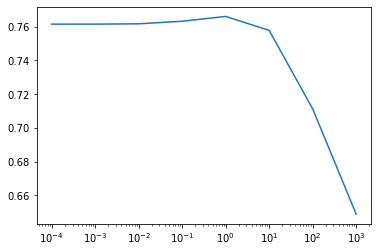

In [26]:
plt.semilogx(alpha_values, scores)

-------- 

- Une fois la valeur idéale de $\alpha=\alpha^*$ trouvée, entrainer le modèle sur l'ensemble de l'ensemble d'entrainement (la totalité des 70%) et mesurer le score sur l'ensemble de test (et tant qu'à faire, aussi sur l'ensemble d'entrainement).

In [38]:
alpha_etoile = np.argmax(np.array(scores))
np.array(alpha_values)[alpha_etoile]

1.0

In [39]:

monModele = sklearn.linear_model.Ridge(alpha=alpha_etoile)

In [40]:
monModele.fit(X_train, Y_train)
monModele.score(X_train, Y_train), monModele.score(X_valid, Y_valid), monModele.score(X_test, Y_test)

(0.748213207969422, 0.7632808782940118, 0.6547701037887255)

In [41]:

Y_train_pred = monModele.predict(X_train)
print("train error", sklearn.metrics.mean_squared_error(Y_train_pred, Y_train))

Y_test_pred = monModele.predict(X_test)
print("test error", sklearn.metrics.mean_squared_error(Y_test_pred, Y_test))

train error 22.40746876043372
test error 25.47796858175652


## Partie 1.2 visualisation et exploitation des résultats 

Ici on va se limiter à très peu de choses:
    - comparer les Y_train_pred aux Y_train
    - comparer les Y_test_pred aux Y_test
    


In [44]:
xmin= min(Y_train.min(), Y_train_pred.min() )-1
xmax= max(Y_train.max(), Y_train_pred.max() )+1

/home/flandes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


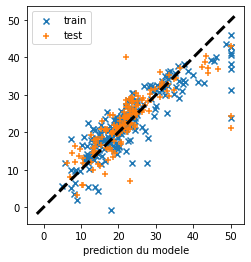

In [45]:
fig = plt.figure(1)
plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

# plt.scatter(??, ??, marker='x', label='train')
# plt.scatter(??, ??, marker='+', label='test')
plt.legend()
plt.xlabel('verite terrain')
plt.xlabel('prediction du modele') # xlabel ou ylabl: a vous de voir
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1
ax = fig.add_subplot(111)
ax.set_aspect('equal') # on veut une figure carrée et pas allongée.
# plt.xlim([xmin,xmax])
# plt.ylim([xmin,xmax])

## Faut il standardiser les entrées ?

In [18]:
import sklearn.preprocessing

In [19]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [20]:
scaler.mean_

array([3.14977506e+00, 1.01781377e+01, 1.12902834e+01, 7.69230769e-02,
       5.55234008e-01, 6.25695142e+00, 6.91056680e+01, 3.70431579e+00,
       9.30769231e+00, 4.08919028e+02, 1.85805668e+01, 3.60754777e+02,
       1.29103239e+01])

In [21]:
scaler.scale_

array([6.85708231e+00, 2.25025111e+01, 7.00173416e+00, 2.66469355e-01,
       1.14560998e-01, 7.36423949e-01, 2.83061668e+01, 2.09365882e+00,
       8.70027581e+00, 1.70090907e+02, 2.10286745e+00, 8.71636285e+01,
       7.13423791e+00])

In [22]:
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [23]:
X_train.shape

(247, 13)

In [24]:
X_train.mean(0), X_train.std(0)

(array([ 4.29031529e-16,  1.91030278e-16,  2.83354087e-15,  5.70843418e-17,
         4.28357305e-15,  5.79608336e-16,  1.09943543e-15, -9.16945332e-17,
        -4.62967496e-17,  5.10163212e-17,  1.50788626e-14,  4.21547637e-15,
         8.44803310e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [25]:
scores2 =[]
for alpha in alpha_values:
    monModele = sklearn.linear_model.Ridge(alpha=alpha)
    monModele.fit(X_train, Y_train)
    score = monModele.score(X_valid, Y_valid)
    scores2.append(score)
    print(alpha, score)

0.0001 0.7615060576721354
0.001 0.7615071979146755
0.01 0.7615185904025452
0.1 0.7616315286354712
1.0 0.762668870175705
10.0 0.7676601719068183
100.0 0.7434154597108105
1000.0 0.48489901296096194


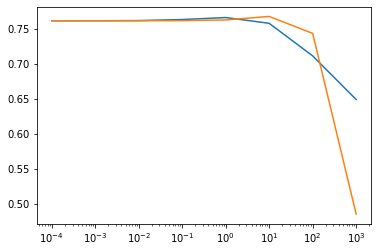

In [26]:
plt.semilogx(alpha_values, scores)
plt.semilogx(alpha_values, scores2)

### Conclusion: oui, avec standardisation, le point alpha=10 devient meilleur, et en fait meilleur que le meilleur des points SANS stannndardisation.

### Remarque: avec la cross-validation, on peut faire mieux, c.a.d. estimer des incertitudes sur les valeurs de nos scores ! Ce serait nettement mieux (là, on avait pas le temps)